In [1]:
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import glob
import splat
from popsims.relations import polynomial_relation
from splat.photometry import filterMag
import splat.empirical as spe
from tqdm import tqdm
import popsims
from popsims.plot_style import  plot_style
#from popsims.abs_mag_relations import POLYNOMIALS
import astropy.units as u
plot_style()
#plt.style.use('dark_background')
%matplotlib inline



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
POLYNOMIALS=(np.load('/users/caganze/research/popsimsdata/abs_mag_relations.npy', allow_pickle=True)).flatten()[0]

In [3]:
def get_distance(dic):
    k = list(dic.keys())[0]
    mag= dic[k]
    #get polynomial
    pol=np.poly1d(POLYNOMIALS['absmags_spt']['dwarfs'][k]['fit'])
    absmag= pol(20)
    distance= popsims.core_tools.get_distance(absmag, mag )
    return {k: distance}

In [9]:
AREAS= {'DES': 5_000*u.degree**2,
       'Rubin': 18_000*u.degree**2, 
       'Roman': 2_000*u.degree**2,
       'Euclid Wide': 15_000*u.degree**2,
        'Euclid Deep': 40*u.degree**2,
       'JWST/PASSAGES': 124*4*u.arcmin**2,
        'JWST/JADES': 200*u.arcmin**2,
        #'JWST/CEERS': 100*u.arcmin**2,
        #'JWST/NGDEEP': 10*u.arcmin**2,
       'Subaru/HSC': 600*u.degree**2,
        'SDSS':15_000*u.degree**2,
       'HST/WFC3': 0.6*u.degree**2,
        '2MASS': 41_253*u.degree**2,
        'VHS': 20_000*u.degree**2,
        'PS1': 30_000*u.degree**2,
        'UKIDSS': 4_028*u.degree**2}

MAG_LIMITS={'DES':{'DECAM_Z': 23.},
            'Rubin':{'LSST_Z': 26.1 },
            'Roman': {'WFI_J129': 24 },
            'Euclid Wide': {'EUCLID_J': 24},
            'Euclid Deep': {'EUCLID_J': 27},
            'JWST/PASSAGES': {'NIRISS_F115W': 27 },
            #'JWST/NGDEEP':{'NIRISS_F115W': 29.15},
            'Subaru/HSC': {'SUBARU_Z': 25.2},
            'JWST/JADES': {'NIRISS_F115W': 29.15},
            #'JWST/CEERS': {'NIRISS_F115W': 29.15},
            'HST/WFC3': {'WFC3_F110W': 22.},
            'SDSS': {'SDSS_Z': 21.3},
            '2MASS': {'UKIDSS_J': 20.},
            'VHS':  {'VISTA_J': 19.5},
            'PS1':  {'SDSS_Z': 22.3},
            'UKIDSS': {'UKIDSS_J':19.9}
           }

DISTS=  dict(zip(MAG_LIMITS.keys(), [get_distance(MAG_LIMITS[k]) for k in MAG_LIMITS.keys()]))


In [10]:
#should add other JWST surveys (GLASS, Imaging & HST/WFC3)
#add Pan-STARRS, SDSS, 2MASS, 

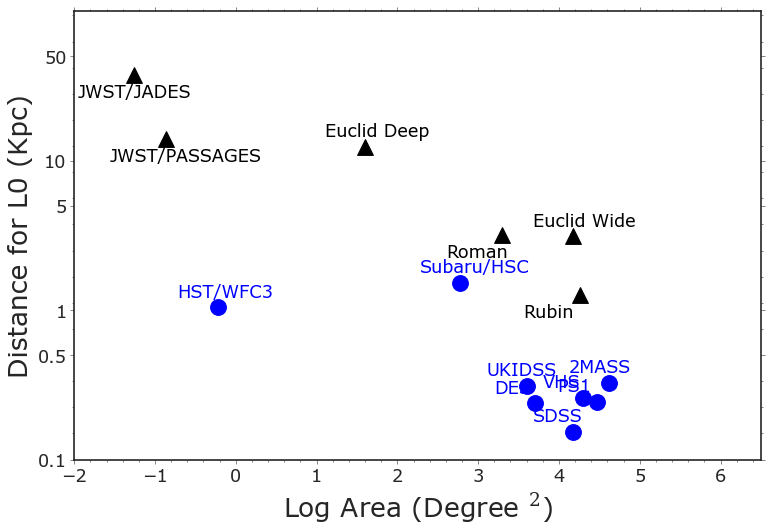

In [13]:
fig, ax=plt.subplots(figsize=(10, 7.))

for k in DISTS.keys():
    area= np.log10( AREAS[k].to(u.degree**2).value)
    dist= np.log10([DISTS[k][kx]/1000 for kx in DISTS[k].keys()][0])
    
    #if k not in ['Rubin', 'Roman']:
    #    ax.scatter(area, dist, marker='^', s=200, color='white')
    #    ax.text(area, dist, '{}'.format(k), fontsize=18,  color='white')
        
    if k in ['Subaru/HSC', 'DES', 'HST/WFC3', 'SDSS', '2MASS', 'PS1', 'UKIDSS', 'VHS']:
        ax.scatter(area, dist, marker='o', s=200, color='b')
        ax.text(area-0.5, dist+0.07, '{}'.format(k), fontsize=16, color='b')
        
    elif k  in  ['Euclid Wide', 'Euclid Deep']:
        ax.scatter(area, dist, marker='^', s=200, color='k')
        ax.text(area-0.5, dist+0.07, '{}'.format(k), fontsize=16, color='k')
        
        
    #elif k  in  ['HST/WFC3']:
    #    ax.scatter(area, dist, marker='s', s=200, color='b')
    #    ax.text(area-0.5, dist+0.07, '{}'.format(k), fontsize=18, color='b')
        
    else:
        ax.scatter(area, dist, marker='^', s=200, color='k')
        ax.text(area-0.7, dist-0.15, '{}'.format(k), fontsize=16,  color='k')
        
    
ax.set(xlim=[-2, 6.5], ylim=[-0.5, 2], yticks=np.log10([0.1, 0.5, 1, 5, 10, 50]), 
       yticklabels=[0.1, 0.5, 1, 5, 10, 50])

ax.set_xlabel(r'Log Area (Degree $^2$)', fontsize=24)
ax.set_ylabel('Distance for L0 (Kpc)',  fontsize=24)
plt.tight_layout()
ax.minorticks_on()
#ax.grid(which='major', axis='y', alpha=0.5)
ax.minorticks_on()
plt.tight_layout()
plt.savefig('../figures/survey_comparison.pdf', bbox_inches='tight')